# Data Preprocessing - Fundraising

In [1]:
##Import the Dataset and Libraries

import pandas as pd 
import numpy as np 

import pickle
from sklearn import datasets
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from math import sqrt
#Import svm model
from sklearn import svm

In [2]:
Df_dataset = pd.read_csv("Mail_Fundraising.csv")

In [3]:
##Explore the dataset

Df_dataset.head(20)

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner,NUMCHLD,INCOME,gender,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1.0,5.0,female,...,1.0,74.0,102.0,6.0,5.0,29.0,3.0,4.857143,1.0,5.00
1,2,25,1,0,0,0,1,1.0,1.0,male,...,4.0,46.0,94.0,12.0,12.0,34.0,6.0,9.400000,1.0,10.00
2,3,29,0,0,0,1,0,2.0,5.0,female,...,13.0,32.0,30.0,10.0,5.0,29.0,7.0,4.285714,1.0,5.00
3,4,38,0,0,0,1,1,1.0,3.0,male,...,4.0,94.0,177.0,10.0,8.0,30.0,3.0,7.080000,0.0,0.00
4,5,40,0,1,0,0,1,1.0,4.0,male,...,7.0,20.0,23.0,11.0,11.0,30.0,6.0,7.666667,0.0,0.00
5,6,53,0,1,0,0,1,1.0,4.0,female,...,28.0,38.0,73.0,10.0,10.0,31.0,3.0,7.300000,1.0,8.00
6,7,58,0,0,0,1,1,1.0,4.0,female,...,5.0,47.0,139.0,20.0,20.0,37.0,3.0,10.692308,1.0,10.00
7,8,61,1,0,0,0,1,1.0,1.0,male,...,9.0,77.0,249.0,15.0,7.0,35.0,3.0,9.576923,1.0,20.00
8,9,71,0,0,1,0,1,1.0,4.0,NaN,...,16.0,51.0,63.0,15.0,10.0,37.0,8.0,9.000000,1.0,5.00
9,10,87,1,0,0,0,1,1.0,4.0,female,...,8.0,21.0,26.0,16.0,16.0,30.0,6.0,13.000000,0.0,0.00


In [4]:
Df_dataset.tail(10)

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner,NUMCHLD,INCOME,gender,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
3110,3111,23234,0,0,1,0,0,1.0,1.0,male,...,28.0,40.0,125.0,20.0,10.0,29.0,5.0,13.888889,0.0,0.0
3111,3112,23236,0,1,0,0,1,1.0,1.0,female,...,10.0,51.0,136.0,12.0,4.0,31.0,4.0,6.800000,0.0,0.0
3112,3113,23237,1,0,0,0,0,1.0,2.0,female,...,22.0,35.0,48.0,10.0,7.0,29.0,3.0,6.857143,1.0,7.0
3113,3114,23247,1,0,0,0,1,1.0,2.0,female,...,25.0,38.0,69.0,9.0,9.0,30.0,6.0,6.900000,0.0,0.0
3114,3115,23248,0,0,0,1,1,1.0,3.0,female,...,2.0,40.0,31.0,20.0,20.0,37.0,1.0,7.750000,0.0,0.0
3115,3116,23256,0,0,0,1,1,1.0,4.0,male,...,11.0,23.0,30.0,16.0,4.0,29.0,5.0,7.500000,0.0,0.0
3116,3117,23258,0,1,0,0,0,1.0,2.0,male,...,0.0,29.0,53.0,30.0,30.0,37.0,9.0,26.500000,1.0,40.0
3117,3118,23261,0,0,0,1,1,1.0,3.0,male,...,6.0,79.0,212.0,20.0,20.0,36.0,3.0,11.157895,0.0,0.0
3118,3119,23265,0,0,0,1,1,1.0,7.0,female,...,6.0,27.0,60.0,20.0,20.0,31.0,9.0,20.000000,0.0,0.0
3119,3120,23293,0,0,1,0,1,1.0,5.0,female,...,21.0,46.0,111.0,22.0,9.0,36.0,5.0,9.250000,0.0,0.0


In [5]:
Df_dataset.dtypes

Row Id            int64
Row Id.           int64
zipconvert_2      int64
zipconvert_3      int64
zipconvert_4      int64
zipconvert_5      int64
homeowner         int64
NUMCHLD         float64
INCOME          float64
gender           object
WEALTH          float64
HV              float64
Icmed           float64
Icavg           float64
IC15            float64
NUMPROM         float64
RAMNTALL        float64
MAXRAMNT        float64
LASTGIFT        float64
totalmonths     float64
TIMELAG         float64
AVGGIFT         float64
TARGET_B        float64
TARGET_D        float64
dtype: object

In [150]:
Df_dataset.describe()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner,NUMCHLD,INCOME,WEALTH,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3119.000000,3119.000000,3111.000000,...,3111.000000,3109.000000,3107.000000,3107.000000,3110.000000,3112.000000,3113.000000,3109.000000,3118.000000,3118.000000
mean,1560.500000,11615.770833,0.214423,0.185256,0.214423,0.384615,0.770192,1.069253,3.893876,6.400836,...,14.709418,49.091669,110.435986,16.658951,13.524598,31.135604,6.862512,10.693876,0.500321,6.503781
std,900.810746,6698.678131,0.410487,0.388568,0.410487,0.486582,0.420777,0.347741,1.636447,2.540929,...,12.089874,22.720044,147.520393,22.267333,10.594516,4.135630,5.565777,7.450971,0.500080,10.599969
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.000000,0.000000
25%,780.750000,5820.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,5.000000,...,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.357143,0.000000,0.000000
50%,1560.500000,11735.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,8.000000,...,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,1.000000,1.000000
75%,2340.250000,17435.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,8.000000,...,21.000000,65.000000,134.250000,20.000000,16.000000,34.000000,9.000000,12.823529,1.000000,10.000000
max,3120.000000,23293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,9.000000,...,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.000000,200.000000


In [6]:
Df_dataset['TARGET_D'].describe()

count    3118.000000
mean        6.503781
std        10.599969
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max       200.000000
Name: TARGET_D, dtype: float64

In [7]:
Df_dataset['TARGET_B'].describe()

count    3118.000000
mean        0.500321
std         0.500080
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: TARGET_B, dtype: float64

In [8]:
#Convert gender column to binary values
Df_dataset.gender[Df_dataset.gender == 'male'] = 0
Df_dataset.gender[Df_dataset.gender == 'female'] = 1
Df_dataset

C:\Users\ridmi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ridmi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner,NUMCHLD,INCOME,gender,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1.0,5.0,1,...,1.0,74.0,102.0,6.0,5.0,29.0,3.0,4.857143,1.0,5.0
1,2,25,1,0,0,0,1,1.0,1.0,0,...,4.0,46.0,94.0,12.0,12.0,34.0,6.0,9.400000,1.0,10.0
2,3,29,0,0,0,1,0,2.0,5.0,1,...,13.0,32.0,30.0,10.0,5.0,29.0,7.0,4.285714,1.0,5.0
3,4,38,0,0,0,1,1,1.0,3.0,0,...,4.0,94.0,177.0,10.0,8.0,30.0,3.0,7.080000,0.0,0.0
4,5,40,0,1,0,0,1,1.0,4.0,0,...,7.0,20.0,23.0,11.0,11.0,30.0,6.0,7.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3116,23256,0,0,0,1,1,1.0,4.0,0,...,11.0,23.0,30.0,16.0,4.0,29.0,5.0,7.500000,0.0,0.0
3116,3117,23258,0,1,0,0,0,1.0,2.0,0,...,0.0,29.0,53.0,30.0,30.0,37.0,9.0,26.500000,1.0,40.0
3117,3118,23261,0,0,0,1,1,1.0,3.0,0,...,6.0,79.0,212.0,20.0,20.0,36.0,3.0,11.157895,0.0,0.0
3118,3119,23265,0,0,0,1,1,1.0,7.0,1,...,6.0,27.0,60.0,20.0,20.0,31.0,9.0,20.000000,0.0,0.0


In [9]:
#Check number of missing values,Column wise
Df_dataset.isnull().sum()

Row Id           0
Row Id.          0
zipconvert_2     0
zipconvert_3     0
zipconvert_4     0
zipconvert_5     0
homeowner        0
NUMCHLD          1
INCOME           1
gender           4
WEALTH           9
HV               8
Icmed           14
Icavg            9
IC15             9
NUMPROM         11
RAMNTALL        13
MAXRAMNT        13
LASTGIFT        10
totalmonths      8
TIMELAG          7
AVGGIFT         11
TARGET_B         2
TARGET_D         2
dtype: int64

In [10]:
#Check number of missing values,Row wise
Df_dataset.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3115    0
3116    0
3117    0
3118    0
3119    0
Length: 3120, dtype: int64

In [11]:
#remove rows which has missing values missing 
Df_dataset = Df_dataset.dropna(how = 'any')
Df_dataset

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner,NUMCHLD,INCOME,gender,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1.0,5.0,1,...,1.0,74.0,102.0,6.0,5.0,29.0,3.0,4.857143,1.0,5.0
1,2,25,1,0,0,0,1,1.0,1.0,0,...,4.0,46.0,94.0,12.0,12.0,34.0,6.0,9.400000,1.0,10.0
2,3,29,0,0,0,1,0,2.0,5.0,1,...,13.0,32.0,30.0,10.0,5.0,29.0,7.0,4.285714,1.0,5.0
3,4,38,0,0,0,1,1,1.0,3.0,0,...,4.0,94.0,177.0,10.0,8.0,30.0,3.0,7.080000,0.0,0.0
4,5,40,0,1,0,0,1,1.0,4.0,0,...,7.0,20.0,23.0,11.0,11.0,30.0,6.0,7.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3116,23256,0,0,0,1,1,1.0,4.0,0,...,11.0,23.0,30.0,16.0,4.0,29.0,5.0,7.500000,0.0,0.0
3116,3117,23258,0,1,0,0,0,1.0,2.0,0,...,0.0,29.0,53.0,30.0,30.0,37.0,9.0,26.500000,1.0,40.0
3117,3118,23261,0,0,0,1,1,1.0,3.0,0,...,6.0,79.0,212.0,20.0,20.0,36.0,3.0,11.157895,0.0,0.0
3118,3119,23265,0,0,0,1,1,1.0,7.0,1,...,6.0,27.0,60.0,20.0,20.0,31.0,9.0,20.000000,0.0,0.0


In [12]:
##Removing irrelevant columns

Df_dataset.AVGGIFT=Df_dataset['AVGGIFT'].round(decimals=2)
Df_dataset.loc[Df_dataset['zipconvert_3'] == 1, 'zipconvert_3'] = 2
Df_dataset.loc[Df_dataset['zipconvert_4'] == 1, 'zipconvert_4'] = 3
Df_dataset.loc[Df_dataset['zipconvert_5'] == 1, 'zipconvert_5'] = 4
Df_dataset['zip'] = Df_dataset['zipconvert_2'] + Df_dataset['zipconvert_3'] + Df_dataset['zipconvert_4'] + Df_dataset['zipconvert_5'] 

Df_dataset.AVGGIFT=Df_dataset['AVGGIFT'].round(decimals=2)
Df_dataset


C:\Users\ridmi\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\ridmi\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ridmi\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner,NUMCHLD,INCOME,gender,...,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,zip
0,1,17,0,2,0,0,1,1.0,5.0,1,...,74.0,102.0,6.0,5.0,29.0,3.0,4.86,1.0,5.0,2
1,2,25,1,0,0,0,1,1.0,1.0,0,...,46.0,94.0,12.0,12.0,34.0,6.0,9.40,1.0,10.0,1
2,3,29,0,0,0,4,0,2.0,5.0,1,...,32.0,30.0,10.0,5.0,29.0,7.0,4.29,1.0,5.0,4
3,4,38,0,0,0,4,1,1.0,3.0,0,...,94.0,177.0,10.0,8.0,30.0,3.0,7.08,0.0,0.0,4
4,5,40,0,2,0,0,1,1.0,4.0,0,...,20.0,23.0,11.0,11.0,30.0,6.0,7.67,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3116,23256,0,0,0,4,1,1.0,4.0,0,...,23.0,30.0,16.0,4.0,29.0,5.0,7.50,0.0,0.0,4
3116,3117,23258,0,2,0,0,0,1.0,2.0,0,...,29.0,53.0,30.0,30.0,37.0,9.0,26.50,1.0,40.0,2
3117,3118,23261,0,0,0,4,1,1.0,3.0,0,...,79.0,212.0,20.0,20.0,36.0,3.0,11.16,0.0,0.0,4
3118,3119,23265,0,0,0,4,1,1.0,7.0,1,...,27.0,60.0,20.0,20.0,31.0,9.0,20.00,0.0,0.0,4


In [13]:
#Save the cleaned dataframe to local path 
Df_dataset.to_csv("Cleaned_Fundraising.csv", index = False)

# Train and Test Split

In [14]:
X = Df_dataset.drop(['zipconvert_2','zipconvert_3','zipconvert_4','zipconvert_5','Row Id','Row Id.','TARGET_D','TARGET_B'],axis=1)
y= Df_dataset['TARGET_B']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)


In [15]:
X_test.head()

,homeowner,NUMCHLD,INCOME,gender,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,zip
306,1,1.0,4.0,1,8.0,2411.0,394.0,437.0,13.0,57.0,122.00,10.0,7.0,17.0,3.0,6.10,4
1578,1,1.0,4.0,0,3.0,992.0,321.0,388.0,20.0,104.0,226.00,11.0,10.0,31.0,6.0,7.53,2
2153,1,1.0,4.0,1,8.0,2710.0,580.0,743.0,2.0,25.0,25.00,10.0,5.0,28.0,5.0,6.25,2
905,1,1.0,4.0,1,8.0,4069.0,821.0,902.0,2.0,27.0,123.00,24.0,15.0,28.0,1.0,15.38,4
1660,1,1.0,4.0,0,0.0,351.0,194.0,284.0,34.0,78.0,210.25,10.0,10.0,33.0,6.0,7.01,3


# Plotting of Train and Test Set in Python

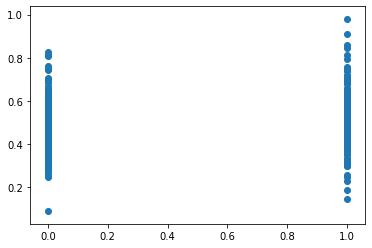

In [16]:
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(X_train,y_train)
predictions=model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

# Scaling the features

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
train_scaled = scaler.fit_transform(X_train) 
test_scaled = scaler.transform(X_test) 

# Classification Models

# 1 - Nearest Neighbors - KNNeighborsClassifier 

# Error rate for different k values

In [19]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

‘fit’ method is used to train the model on training data (X_train,y_train) and ‘predict’ method to do the testing on testing data (X_test). 

In [20]:
rmse_val = [] #to store rmse values for different k
#try running from k=1 through 20 and record testing accuracy. 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.7211461339024373
RMSE value for k=  2 is: 0.6203742141551467
RMSE value for k=  3 is: 0.5869796099754669
RMSE value for k=  4 is: 0.5648443671670192
RMSE value for k=  5 is: 0.558041298253341
RMSE value for k=  6 is: 0.5458363576280074
RMSE value for k=  7 is: 0.5421972664591143
RMSE value for k=  8 is: 0.534222573545317
RMSE value for k=  9 is: 0.5320753214545444
RMSE value for k=  10 is: 0.5303834440019881
RMSE value for k=  11 is: 0.5276302891247434
RMSE value for k=  12 is: 0.523969107033776
RMSE value for k=  13 is: 0.5238335480612036
RMSE value for k=  14 is: 0.5231524807339197
RMSE value for k=  15 is: 0.518824868261902
RMSE value for k=  16 is: 0.5179068277327115
RMSE value for k=  17 is: 0.5179275066827718
RMSE value for k=  18 is: 0.5176365045358594
RMSE value for k=  19 is: 0.5161995026997047
RMSE value for k=  20 is: 0.5153183871195486


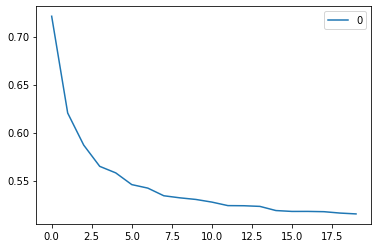

In [21]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

when we take k=1, we get a very high RMSE value. 

# Training and Predictions

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [23]:
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm

# Matplotlib - Confusion Matrix Plot

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[1,0])
print(confusion_matrix(y_pred, y_test, labels=[1,0]))

#print(classification_report(y_test, y_pred))

[[198 203]
 [171 201]]


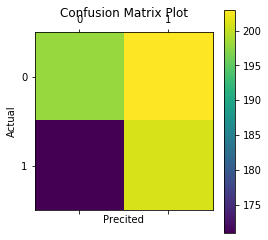

In [25]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [26]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=True, margins_name="Total")


Actual,Donor,non-Donor,Total
pred,,,
Donor,198,203,401
non-Donor,171,201,372
Total,369,404,773


In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Rate :",metrics.accuracy_score(y_test, y_pred)*100)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Accuracy Rate : 51.61707632600259
Precision : 0.4937655860349127
Recall : 0.5365853658536586


# Comparing Error Rate with the K Value

In [28]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

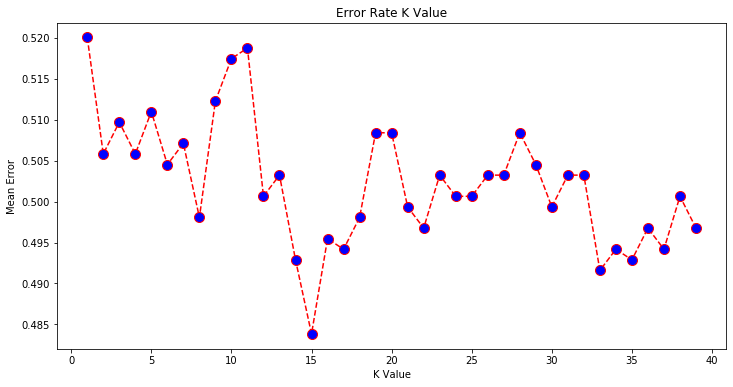

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Build KNN classifier model for k=15

In [30]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Evaluation 

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Rate :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Rate : 51.61707632600259


In [32]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Precision : 0.4937655860349127
Recall : 0.5365853658536586


# 2 - Decision Trees Classifier 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Matplotlib - Confusion Matrix Plot

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[1,0])
print(confusion_matrix(y_pred, y_test, labels=[1,0]))
#print(classification_report(y_test, y_pred))

[[162 164]
 [207 240]]


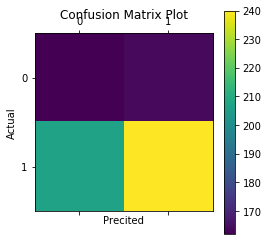

In [36]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [37]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=True, margins_name="Total")

Actual,Donor,non-Donor,Total
pred,,,
Donor,162,164,326
non-Donor,207,240,447
Total,369,404,773


In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 52.00517464424321


In [39]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Precision : 0.49693251533742333
Recall : 0.43902439024390244


# 3 - Naive Bayes - Train the model

In [298]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
model = GaussianNB()
model.fit(train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Prediction

In [300]:
y_pred = model.predict(X_test)

# Matplotlib - Confusion Matrix Plot

In [303]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[1,0])
print(confusion_matrix(y_pred, y_test, labels=[1,0]))

[[ 10   3]
 [359 401]]


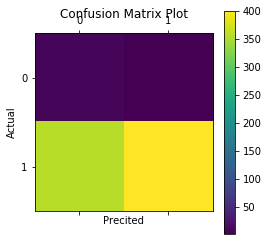

In [304]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [305]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=True, margins_name="Total")

Actual,Donor,non-Donor,Total
pred,,,
Donor,10,3,13
non-Donor,359,401,760
Total,369,404,773


# Model Evaluation

In [294]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy Rate :" + str(accuracy))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Accuracy Rate :53.169469598965065
Precision : 0.7692307692307693
Recall : 0.02710027100271003


# 4 - Random Forests

In [44]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Matplotlib - Confusion Matrix Plot

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[1,0])
print(confusion_matrix(y_pred, y_test, labels=[1,0]))

[[155 149]
 [214 255]]


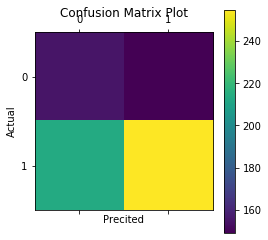

In [46]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [47]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=True, margins_name="Total")

Actual,Donor,non-Donor,Total
pred,,,
Donor,155,149,304
non-Donor,214,255,469
Total,369,404,773


In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 53.04010349288486


In [49]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Precision : 0.5098684210526315
Recall : 0.42005420054200543


# 5 - Voting Classifier (Decision Tree Classifier & Random Forest Classifier)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


clf1 = RandomForestClassifier(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf = VotingClassifier(estimators=[('lr1', clf1),('dt',clf2)], voting='hard')
clf.fit(train_scaled,y_train)
score=clf.score(test_scaled, y_test)

In [51]:
# Saving model to disk
pickle.dump(clf, open('Dicision_RandomForest_Model.pkl','wb'))

# Loading model to compare the results
DR_model = pickle.load(open('Dicision_RandomForest_Model.pkl','rb'))

In [52]:
y_pred = DR_model.predict(X_test)

# Matplotlib - Confusion Matrix Plot

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[1,0])
print(confusion_matrix(y_pred, y_test, labels=[1,0]))

[[136 161]
 [233 243]]


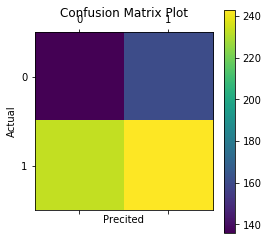

In [54]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [55]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=True, margins_name="Total")

Actual,Donor,non-Donor,Total
pred,,,
Donor,136,161,297
non-Donor,233,243,476
Total,369,404,773


In [56]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy Rate :" + str(accuracy))

Accuracy Rate :49.029754204398444


In [57]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Precision : 0.45791245791245794
Recall : 0.3685636856368564


# 6 - Neural Network – MLPClassifier

In [58]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic',hidden_layer_sizes=(1000,1500),solver='lbfgs', random_state=101)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Matplotlib - Confusion Matrix Plot

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[1,0])
print(confusion_matrix(y_pred, y_test, labels=[1,0]))

[[369 404]
 [  0   0]]


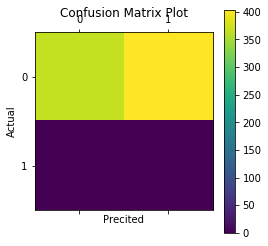

In [60]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [61]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=True, margins_name="Total")

Actual,Donor,non-Donor,Total
pred,,,
Donor,369,404,773
Total,369,404,773


In [62]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy Rate :" + str(accuracy))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Accuracy Rate :47.73609314359638
Precision : 0.47736093143596375
Recall : 1.0


In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[   0 1140]
 [   0 1178]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1140
         1.0       0.51      1.00      0.67      1178

    accuracy                           0.51      2318
   macro avg       0.25      0.50      0.34      2318
weighted avg       0.26      0.51      0.34      2318



C:\Users\ridmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[  0 404]
 [  0 369]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       404
         1.0       0.48      1.00      0.65       369

    accuracy                           0.48       773
   macro avg       0.24      0.50      0.32       773
weighted avg       0.23      0.48      0.31       773



# 7 - Classification Model Selection - Voting Classifier

In [65]:
from sklearn.preprocessing import StandardScaler
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
train_scaled = scaler.fit_transform(X_train) 
test_scaled = scaler.transform(X_test) 

In [66]:
clf1 = RandomForestClassifier(n_estimators=210,max_depth=3)
clf2 = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(1000, 1500), random_state=101)
clf3 = KNeighborsClassifier(n_neighbors=50)
#clf4 = svm.SVC(kernel='linear')
clf = VotingClassifier(estimators=[('lr1', clf1), ('mlp', clf2), ('knn',clf3)], voting='hard')
clf.fit(train_scaled,y_train)
score=clf.score(test_scaled, y_test)

C:\Users\ridmi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [67]:
# Saving model to disk
pickle.dump(clf, open('Voting Classifier_Model.pkl','wb'))

# Loading model to compare the results
cmodel = pickle.load(open('Voting Classifier_Model.pkl','rb'))

In [68]:
y_pred = cmodel.predict(X_test)

# Matplotlib - Confusion Matrix Plot

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[1,0])
print(confusion_matrix(y_pred, y_test, labels=[1,0]))

[[  6   3]
 [363 401]]


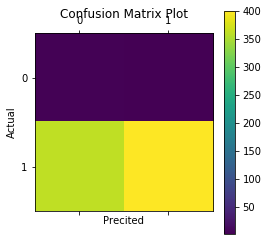

In [70]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [71]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])
pred = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Donor','non-Donor')), categories = ['Donor','non-Donor'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=True, margins_name="Total")

Actual,Donor,non-Donor,Total
pred,,,
Donor,6,3,9
non-Donor,363,401,764
Total,369,404,773


In [72]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy Rate :" + str(accuracy))

Accuracy Rate :52.652005174644245


In [73]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall :",metrics.recall_score(y_test, y_pred))

Precision : 0.6666666666666666
Recall : 0.016260162601626018


# Select Classification Model

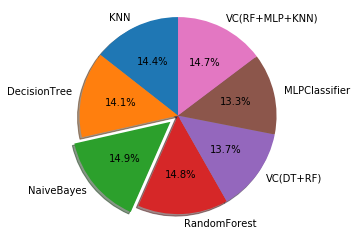

In [288]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'KNN', 'DecisionTree', 'NaiveBayes', 'RandomForest','VC(DT+RF)','MLPClassifier','VC(RF+MLP+KNN)'
sizes = [51.62,50.45,53.17,53.04,49.03,47.74,52.65]
explode = (0,0, 0.1, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Naive Bayes has the highest Accuracy among other classification models